In [1]:
# Imports
import os
import shutil
import cv2
import numpy as np
from tqdm import tqdm
# import tensorflow as tf
# from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

### Segregate Data into Train, validation and test Sets

In [26]:
# def get_train_val_test_data(arr):
#         g_files = [x for x in arr if '-G-' in x]
#         f_files = [x for x in arr if '-F-' in x]
        
#         g_train_num = int(len(g_files)*0.7)

#         g_train = g_files[:g_train_num]
#         g_temp = g_files[g_train_num:]

#         g_val_nums = len(g_temp) // 2
#         g_val = g_temp[:g_val_nums]
#         g_test = g_temp[g_val_nums:]

#         f_train_num = int(len(f_files)*0.7)

#         f_train = f_files[:f_train_num]
#         f_temp = f_files[f_train_num:]

#         f_val_nums = len(f_temp) // 2
#         f_val = f_temp[:f_val_nums]
#         f_test = f_temp[f_val_nums:]

#         return g_train, g_val, g_test, f_train, f_val, f_test

In [38]:
# data_dir = '..\\data'
# train_dir = "train_data"
# val_dir = "val_data"
# test_dir = "test_data"
# count = 0
# for language in os.listdir(data_dir):
#     language_dir = os.path.join(data_dir, language)
#     # print(language_dir)
#     if os.path.isdir(language_dir):
#         for user in os.listdir(language_dir):
#             user_dir = os.path.join(language_dir, user)
#             # print(user_dir)
#             files = list(os.listdir(user_dir))
#             # print(files)
#             g_train, g_val, g_test, f_train, f_val, f_test = get_train_val_test_data(files)
            
#             for data_type in [g_train, g_val, g_test, f_train, f_val, f_test]:
#                 src_folder = user_dir
#                 if data_type in [g_train, f_train]:
#                     os.makedirs(os.path.join(data_dir, train_dir), exist_ok=True)
#                     tmp_folder = os.path.join(data_dir, train_dir)
#                     if data_type == g_train:
#                         os.makedirs(os.path.join(tmp_folder, 'genuine'), exist_ok=True)
#                         dest_folder = os.path.join(tmp_folder, 'genuine')
#                     else:
#                         os.makedirs(os.path.join(tmp_folder, 'forge'), exist_ok=True)
#                         dest_folder = os.path.join(tmp_folder, 'forge')
                        
#                 elif data_type in [g_val, f_val]:
#                     os.makedirs(os.path.join(data_dir, val_dir), exist_ok=True)
#                     tmp_folder = os.path.join(data_dir, val_dir)
#                     if data_type == g_val:
#                         os.makedirs(os.path.join(tmp_folder, 'genuine'), exist_ok=True)
#                         dest_folder = os.path.join(tmp_folder, 'genuine')
#                     else:
#                         os.makedirs(os.path.join(tmp_folder, 'forge'), exist_ok=True)
#                         dest_folder = os.path.join(tmp_folder, 'forge')

#                 elif data_type in [g_test, f_test]:
#                     os.makedirs(os.path.join(data_dir, test_dir), exist_ok=True)
#                     tmp_folder = os.path.join(data_dir, test_dir)
#                     if data_type == g_test:
#                         os.makedirs(os.path.join(tmp_folder, 'genuine'), exist_ok=True)
#                         dest_folder = os.path.join(tmp_folder, 'genuine')
#                     else:
#                         os.makedirs(os.path.join(tmp_folder, 'forge'), exist_ok=True)
#                         dest_folder = os.path.join(tmp_folder, 'forge')
            
            
#                 # Copy each file in the list to the destination folder

#                 for file in data_type:
#                     src_string = os.path.join(src_folder, file)
#                     # if string == dest_folder:
#                     # print(string, dest_folder)
#                     shutil.copy(src_string, dest_folder)
#                     count += 1

### Preprocessing

In [2]:
filepath = '..//data//train_data//genuine//B-S-1-G-01.tif'

In [3]:
img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (150, 150))
# img = img / 255.0  # Normalize pixel values
print(img)
img = np.asarray(img)
print()
print(img)
print()
X = [img]
print(X)
# y = [1]
# X, y = np.array(X), np.array(y)
# cv2.imshow("Image", img)
# # Wait for the user to press a key
# cv2.waitKey(0)
 
# # Close all windows
# cv2.destroyAllWindows()

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]

[array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)]


In [4]:
print(f'dtype: {img.dtype}, shape: {img.shape}, min: {np.min(img)}, max: {np.max(img)}')

dtype: uint8, shape: (150, 150), min: 0, max: 255


In [5]:
# Function to load and preprocess images
# Change to Grayscale
# Resize
# Normalize
def preprocess_images(directory, label, img_size=(150, 150)):
    X = []
    y = []
    for filename in os.listdir(directory):
        if filename.endswith(".tif"):
            img = cv2.imread(os.path.join(directory, filename), cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, img_size)
            # print(img)
            img = img / 255.0  # Normalize pixel values
            # print(img)
            img = np.asarray(img)
            # print(img)
            X.append(img)
            y.append(label)
    return np.array(X), np.array(y)

In [6]:
# Load and preprocess data

def get_preprocessed_data(directory):
    X = []
    y = []
    for i, data_type in tqdm(enumerate(os.listdir(data_dir)), total=len(os.listdir(data_dir)), desc='Progress...'):
        type_dir = os.path.join(data_dir, data_type)
        if os.path.isdir(type_dir):
            # print(type_dir)
            # Load genuine signatures
            if 'genuine' in type_dir:
                genuine_X, genuine_y = preprocess_images(type_dir, label=1)
                # print(genuine_X)
                # return
                X.extend(genuine_X)
                y.extend(genuine_y)
                
            else:
                forged_X, forged_y = preprocess_images(type_dir, label=0)
                X.extend(forged_X)
                y.extend(forged_y)
        
    X = np.array(X)
    y = np.array(y)
    shuffled_indices = np.random.permutation(X.shape[0])

    # Shuffle arrays using shuffled indices
    X_shuffled = X[shuffled_indices]
    y_shuffled = y[shuffled_indices]

    return X_shuffled, y_shuffled

#### Training and Validation Sets

In [7]:
data_dir = "..\\data\\train_data"
X_train, y_train = get_preprocessed_data(directory=data_dir)

Progress...: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [01:53<00:00, 56.81s/it]


In [8]:
data_dir = "..\\data\\val_data"
X_val, y_val = get_preprocessed_data(directory=data_dir)

Progress...: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:23<00:00, 11.58s/it]


### Model Architecture

#### Model 1

__Handwritten Signature Forgery Detection using CNN - _Jerome Gideon S, Anurag, Kandulna, Aron Abhishek Kajur, Diana A, Kumudha Raimond___ (https://www.sciencedirect.com/science/article/pii/S1877050918320301)

In [14]:
# Model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5), 
    Dense(1, activation='sigmoid')
])

In [15]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
# Display the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 128)     

### Model Training

Number of batches = len(X_train)//batch_size

In [17]:
# Train the model
history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val), 
                    epochs=10, batch_size=32)

Epoch 1/10
301/301 [==============================] - 242s 802ms/step - loss: 0.5974 - accuracy: 0.6833 - val_loss: 0.5293 - val_accuracy: 0.7341
Epoch 2/10
301/301 [==============================] - 244s 812ms/step - loss: 0.4740 - accuracy: 0.7808 - val_loss: 0.4149 - val_accuracy: 0.8030
Epoch 3/10
301/301 [==============================] - 238s 792ms/step - loss: 0.3794 - accuracy: 0.8326 - val_loss: 0.3990 - val_accuracy: 0.8382
Epoch 4/10
301/301 [==============================] - 238s 789ms/step - loss: 0.2952 - accuracy: 0.8748 - val_loss: 0.3076 - val_accuracy: 0.8728
Epoch 5/10
301/301 [==============================] - 237s 788ms/step - loss: 0.2200 - accuracy: 0.9131 - val_loss: 0.2719 - val_accuracy: 0.8926
Epoch 6/10
301/301 [==============================] - 238s 792ms/step - loss: 0.1638 - accuracy: 0.9349 - val_loss: 0.3137 - val_accuracy: 0.8921
Epoch 7/10
301/301 [==============================] - 238s 790ms/step - loss: 0.1303 - accuracy: 0.9485 - val_loss: 0.2770 -

#### Model performance Visualization

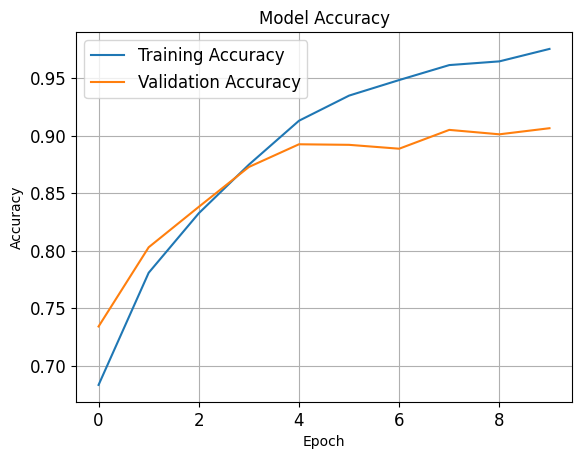

In [20]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

As can be seen the model still tries to learn the inherent patterns even after `10 epochs` while the validation sets are stagnated at 90%.

We shall try a different architecture to check the performance and see if it performs better.

#### Model 2

In [25]:
model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),  # Additional hidden layer
    Dropout(0.5),                    # Additional dropout layer
    Dense(128, activation='relu'),  # Additional hidden layer
    Dropout(0.5),                    # Additional dropout layer
    Dense(1, activation='sigmoid')
])

In [26]:
# Compile the model
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print model summary
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 17, 17, 128)     

In [27]:
history2 = model2.fit(X_train, y_train, 
                    validation_data=(X_val, y_val), 
                    epochs=10, batch_size=32)

Epoch 1/10
301/301 [==============================] - 345s 1s/step - loss: 0.6216 - accuracy: 0.6556 - val_loss: 0.5187 - val_accuracy: 0.7524
Epoch 2/10
301/301 [==============================] - 366s 1s/step - loss: 0.4798 - accuracy: 0.7812 - val_loss: 0.4095 - val_accuracy: 0.8247
Epoch 3/10
301/301 [==============================] - 442s 1s/step - loss: 0.3482 - accuracy: 0.8530 - val_loss: 0.3817 - val_accuracy: 0.8280
Epoch 4/10
301/301 [==============================] - 388s 1s/step - loss: 0.2247 - accuracy: 0.9112 - val_loss: 0.2682 - val_accuracy: 0.8916
Epoch 5/10
301/301 [==============================] - 431s 1s/step - loss: 0.1304 - accuracy: 0.9518 - val_loss: 0.3145 - val_accuracy: 0.9022
Epoch 6/10
301/301 [==============================] - 364s 1s/step - loss: 0.0849 - accuracy: 0.9704 - val_loss: 0.3117 - val_accuracy: 0.9128
Epoch 7/10
301/301 [==============================] - 313s 1s/step - loss: 0.0604 - accuracy: 0.9779 - val_loss: 0.4942 - val_accuracy: 0.8767

As we see even with more layers added in, the validation accuracy doesnot improve while the training accuracy improves by about `1.5%`. So we can check the general performance on test set and make a decision on the model to optimize. 

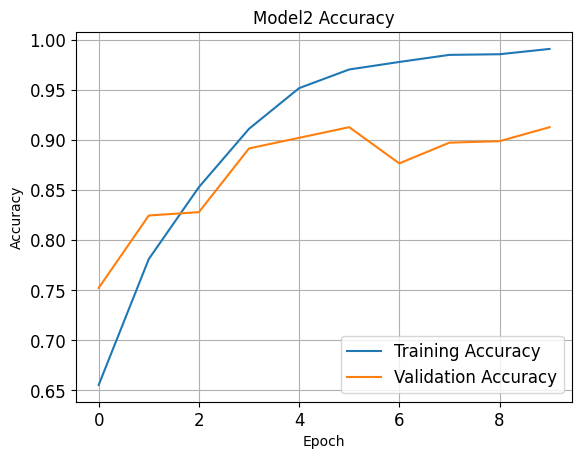

In [28]:
# Plot training & validation accuracy values
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model2 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

### Evaluation on Test set to select base model

In [29]:
data_dir = "..\\data\\test_data"
X_test, y_test = get_preprocessed_data(directory=data_dir)

Progress...: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:28<00:00, 14.05s/it]


In [32]:
# Evaluate Model 1 on the test set
test_loss_1, test_accuracy_1 = model.evaluate(X_test, y_test)
print("Model 1 - Test Loss:", test_loss_1)
print("Model 1 - Test Accuracy:", test_accuracy_1)

# Evaluate Model 2 on the test set
test_loss_2, test_accuracy_2 = model2.evaluate(X_test, y_test)
print("Model 2 - Test Loss:", test_loss_2)
print("Model 2 - Test Accuracy:", test_accuracy_2)


73/73 [==============================] - 16s 211ms/step - loss: 0.3290 - accuracy: 0.9152
Model 1 - Test Loss: 0.3290092945098877
Model 1 - Test Accuracy: 0.9152397513389587
73/73 [==============================] - 18s 244ms/step - loss: 0.4235 - accuracy: 0.9174
Model 2 - Test Loss: 0.42353132367134094
Model 2 - Test Accuracy: 0.917380154132843


As we can see both models have similar performance and Model 2 is more complex and takes more time to build.
Hence we shall select Model 1 as the base model. We shall try to optimize Model 1 for better generalization.

### Hyperparameter Tuning